## 📘 Introduction 

This project is conducted as part of the **Data Mining** course and focuses on applying **classification techniques** to a real-world dataset.  
The dataset consists of **10,000 records** with various features related to:

- 👤 **Individuals' demographics**
- 🚗 **Driving behavior**
- 🚙 **Vehicle information**
- 💳 **Credit background**

The **primary goal** is to **predict the `OUTCOME` attribute**, which serves as the **target variable** for classification.  
This attribute indicates whether a customer **accepted (1)** or **rejected (0)** an insurance offer.

📊 The data was collected by an **insurance company**, with some instances being **randomly generated** to enrich the dataset.

---

## 🤖 Algorithms Used

We trained the model using **12 different classification algorithms**, including both traditional and ensemble methods:

- 🌳 **Decision Tree**
- 🤝 **K-Nearest Neighbors (KNN)**
- 💻 **Support Vector Machine (SVM)**
- 🧠 **Naive Bayes**
- 🧬 **Neural Network**
- 🚀 **Gradient Boosting (gBoost)**
- ⚡ **AdaBoost**
- 🛡️ **Bagging**
- 🧨 **Extreme Gradient Boosting (xgBoost)**
- 📈 **Logistic Regression**
- 🌲 **Extra Trees Classifier (xTree)**
- 🌳🌳 **Random Forest Classifier**

---

## 📏 Model Evaluation

We compared the performance of these models using appropriate **evaluation metrics**:

- 🎯 **Accuracy**
- 🎯 **Precision**
- 🎯 **Recall**
- 🎯 **F1-Score**
- 🎯 **AUC**

These metrics help us determine which model best predicts the **OUTCOME** and provides insights into the **factors influencing customer decisions**.

---


## importing necessary libraries

In [41]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
# from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score, precision_score, recall_score



## 📋 Feature Descriptions

### 🆔 ID  
Unique identifier for each record (used for tracking only, not for training the model).

---

### 🎂 AGE  
Age category of the person (` ['65+' '16-25' '26-39' '40-64']`) — *Categorical*.

---

### 🚻 GENDER  
Gender of the person (`Male , Female`) — *Categorical*.

---

### 🌍 RACE  
Racial group (`'majority' , 'minority'`) — *Categorical*.

---

### 🚗📅 DRIVING_EXPERIENCE  
Category of driving experience (`['0-9y' '10-19y' '20-29y' '30y+']`) — *Categorical*.

---

### 🎓 EDUCATION  
Level of education (`['high school' 'none' 'university']`) — *Categorical*.

---

### 💰 INCOME  
Income category of the person (`['upper class' 'poverty' 'working class' 'middle class']`) — *Categorical*.

---

### 💳 CREDIT_SCORE  
Numerical credit score — *Numerical*.

---

### 🚘 VEHICLE_OWNERSHIP  
- `1` = Owns a vehicle  
- `0` = Doesn’t own  
**Binary / Numerical**

---

### 🛠️📆 VEHICLE_YEAR  
`Before 2015` or `After 2015` — *Categorical*.

---

### 💍 MARRIED  
- `1` = Married  
- `0` = Not married  
**Binary / Numerical**

---

### 👶 CHILDREN  
- `1` = Has children  
- `0` = No children  
**Binary / Numerical**

---

### 🏠🔢 POSTAL_CODE  
Area code (location ID).

---

### 🛣️📈 ANNUAL_MILEAGE  
Miles driven per year — *Numerical* (some missing values).

---

### 🚙🛻 VEHICLE_TYPE  
Type of vehicle: `'sedan' , 'sports car'` — *Categorical*.

---

### 🏎️⚠️ SPEEDING_VIOLATIONS  
Number of speeding tickets — *Numerical*.

---

### 🍺🚔 DUIS  
Number of DUI (Driving Under Influence) offenses — *Numerical*.

---

### 💥📊 PAST_ACCIDENTS  
Number of previous accidents — *Numerical*.

---

## 🎯 Target Variable: OUTCOME

### ✅❌ OUTCOME  
`Indicates whether the person accepted the insurance offer`.

- `1` = Accepted  
- `0` = Rejected  

This is the **target variable** your the model will learn to **classify** as  `1` = Accepted  `0` = Rejected  !


In [2]:
df = pd.read_csv('data.csv')
# show a samples from the dataset to explain the features
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [3]:

# this is simple description for the dataset
print("The dataset contains " + str(df.shape[0]) + " rows.")
print("The dataset contains " + str(df.shape[1]) + " columns(features).")
print('--------------------------------------------------------')
print("Here is some information features of the dataset.")
df.info()

The dataset contains 10000 rows.
The dataset contains 19 columns(features).
--------------------------------------------------------
Here is some information features of the dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POST

In [4]:
# check how many numeric values and non-numeric values in the dataset
print('--------------------------------------------------------')
print("Non-numeric features")
print(df.select_dtypes(exclude='number').columns)
print('--------------------------------------------------------')
print("Numeric features")
print(df.select_dtypes(include='number').columns)
df.shape

--------------------------------------------------------
Non-numeric features
Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')
--------------------------------------------------------
Numeric features
Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')


(10000, 19)

In [5]:
# unique values for each column
for column in df.columns:
    print(f"📌 Column: {column}")
    print(df[column].unique())
    print('-' * 50)

📌 Column: ID
[569520 750365 199901 ... 468409 903459 442696]
--------------------------------------------------
📌 Column: AGE
['65+' '16-25' '26-39' '40-64']
--------------------------------------------------
📌 Column: GENDER
['female' 'male']
--------------------------------------------------
📌 Column: RACE
['majority' 'minority']
--------------------------------------------------
📌 Column: DRIVING_EXPERIENCE
['0-9y' '10-19y' '20-29y' '30y+']
--------------------------------------------------
📌 Column: EDUCATION
['high school' 'none' 'university']
--------------------------------------------------
📌 Column: INCOME
['upper class' 'poverty' 'working class' 'middle class']
--------------------------------------------------
📌 Column: CREDIT_SCORE
[0.62902731 0.35775712 0.49314579 ... 0.47094023 0.36418478 0.43522478]
--------------------------------------------------
📌 Column: VEHICLE_OWNERSHIP
[1. 0.]
--------------------------------------------------
📌 Column: VEHICLE_YEAR
['after 2015'

In [6]:
print(df.shape)
df.describe().T

(10000, 19)


,count,mean,std,min,25%,50%,75%,max
ID,10000.0,500521.906800,290030.768758,101.000000,249638.500000,501777.000000,753974.500000,999976.000000
CREDIT_SCORE,9018.0,0.515813,0.137688,0.053358,0.417191,0.525033,0.618312,0.960819
VEHICLE_OWNERSHIP,10000.0,0.697000,0.459578,0.000000,0.000000,1.000000,1.000000,1.000000
MARRIED,10000.0,0.498200,0.500022,0.000000,0.000000,0.000000,1.000000,1.000000
CHILDREN,10000.0,0.688800,0.463008,0.000000,0.000000,1.000000,1.000000,1.000000
POSTAL_CODE,10000.0,19864.548400,18915.613855,10238.000000,10238.000000,10238.000000,32765.000000,92101.000000
ANNUAL_MILEAGE,9043.0,11697.003207,2818.434528,2000.000000,10000.000000,12000.000000,14000.000000,22000.000000
SPEEDING_VIOLATIONS,10000.0,1.482900,2.241966,0.000000,0.000000,0.000000,2.000000,22.000000
DUIS,10000.0,0.239200,0.554990,0.000000,0.000000,0.000000,0.000000,6.000000
PAST_ACCIDENTS,10000.0,1.056300,1.652454,0.000000,0.000000,0.000000,2.000000,15.000000


VEHICLE_OWNERSHIP          2
MARRIED                    2
CHILDREN                   2
OUTCOME                    2
POSTAL_CODE                4
DUIS                       7
PAST_ACCIDENTS            15
ANNUAL_MILEAGE            21
SPEEDING_VIOLATIONS       21
CREDIT_SCORE            9018
ID                     10000
dtype: int64


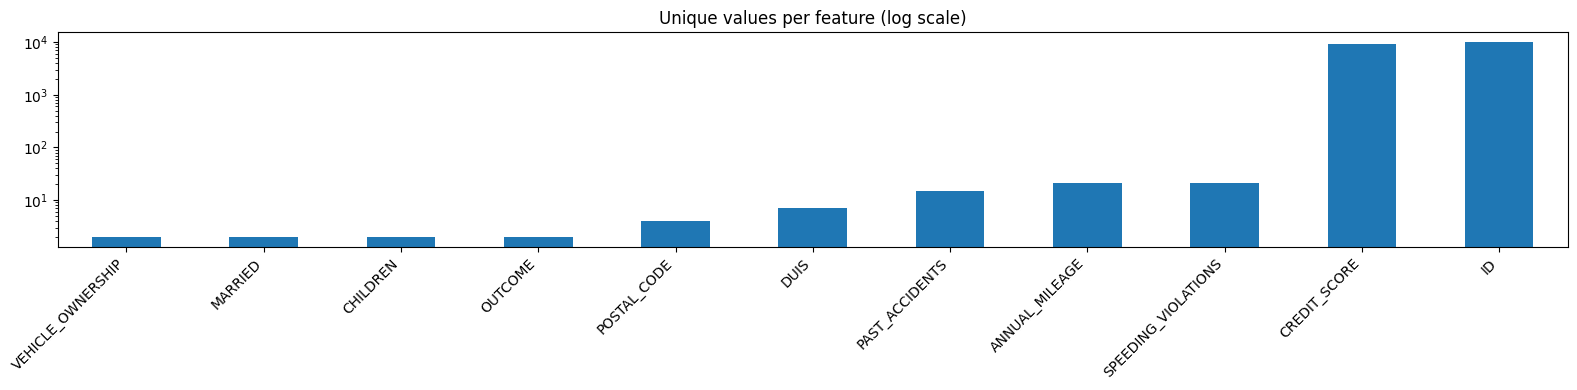

In [7]:
# For each numerical feature # number of unique entries
# unique values
uniqueVal = df.select_dtypes(include="number").nunique().sort_values()
print(uniqueVal)
# Plot information uniqueVal
uniqueVal.plot.bar(figsize=(11, 3), title="Unique values per feature")
ax = uniqueVal.plot.bar(figsize=(16, 4), title="Unique values per feature (log scale)", logy=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [8]:
# check if we have a duplicate rows/samples
duplicates_values = df.duplicated().sum()
duplicates_values

0

### 📊 Visualizing the Relationship Between Numerical Features and the Target (`OUTCOME`)

The following code block is used to **explore the relationship between numerical features and the target variable `OUTCOME`** using **Kernel Density Estimation (KDE) plots**.

- For each selected numeric feature, it plots a **KDE plot** showing the **distribution of values**, separated by the two classes of the target variable `OUTCOME`:
  - `OUTCOME = 0` ❌ → Rejected
  - `OUTCOME = 1` ✅ → Accepted
- The `hue="OUTCOME"` argument colors the distributions based on the class, allowing easy comparison between accepted and rejected insurance offers.

### 🧠 Purpose:

These plots helped us understand:
- How each numerical feature is distributed across the two outcome classes.
- Whether a feature shows **distinct patterns or separation** between `OUTCOME = 0` and `OUTCOME = 1`, which may suggest its **predictive power** in classification models.

> KDE plots are especially useful for understanding the **shape of data distributions** and spotting overlapping or separating patterns between classes.


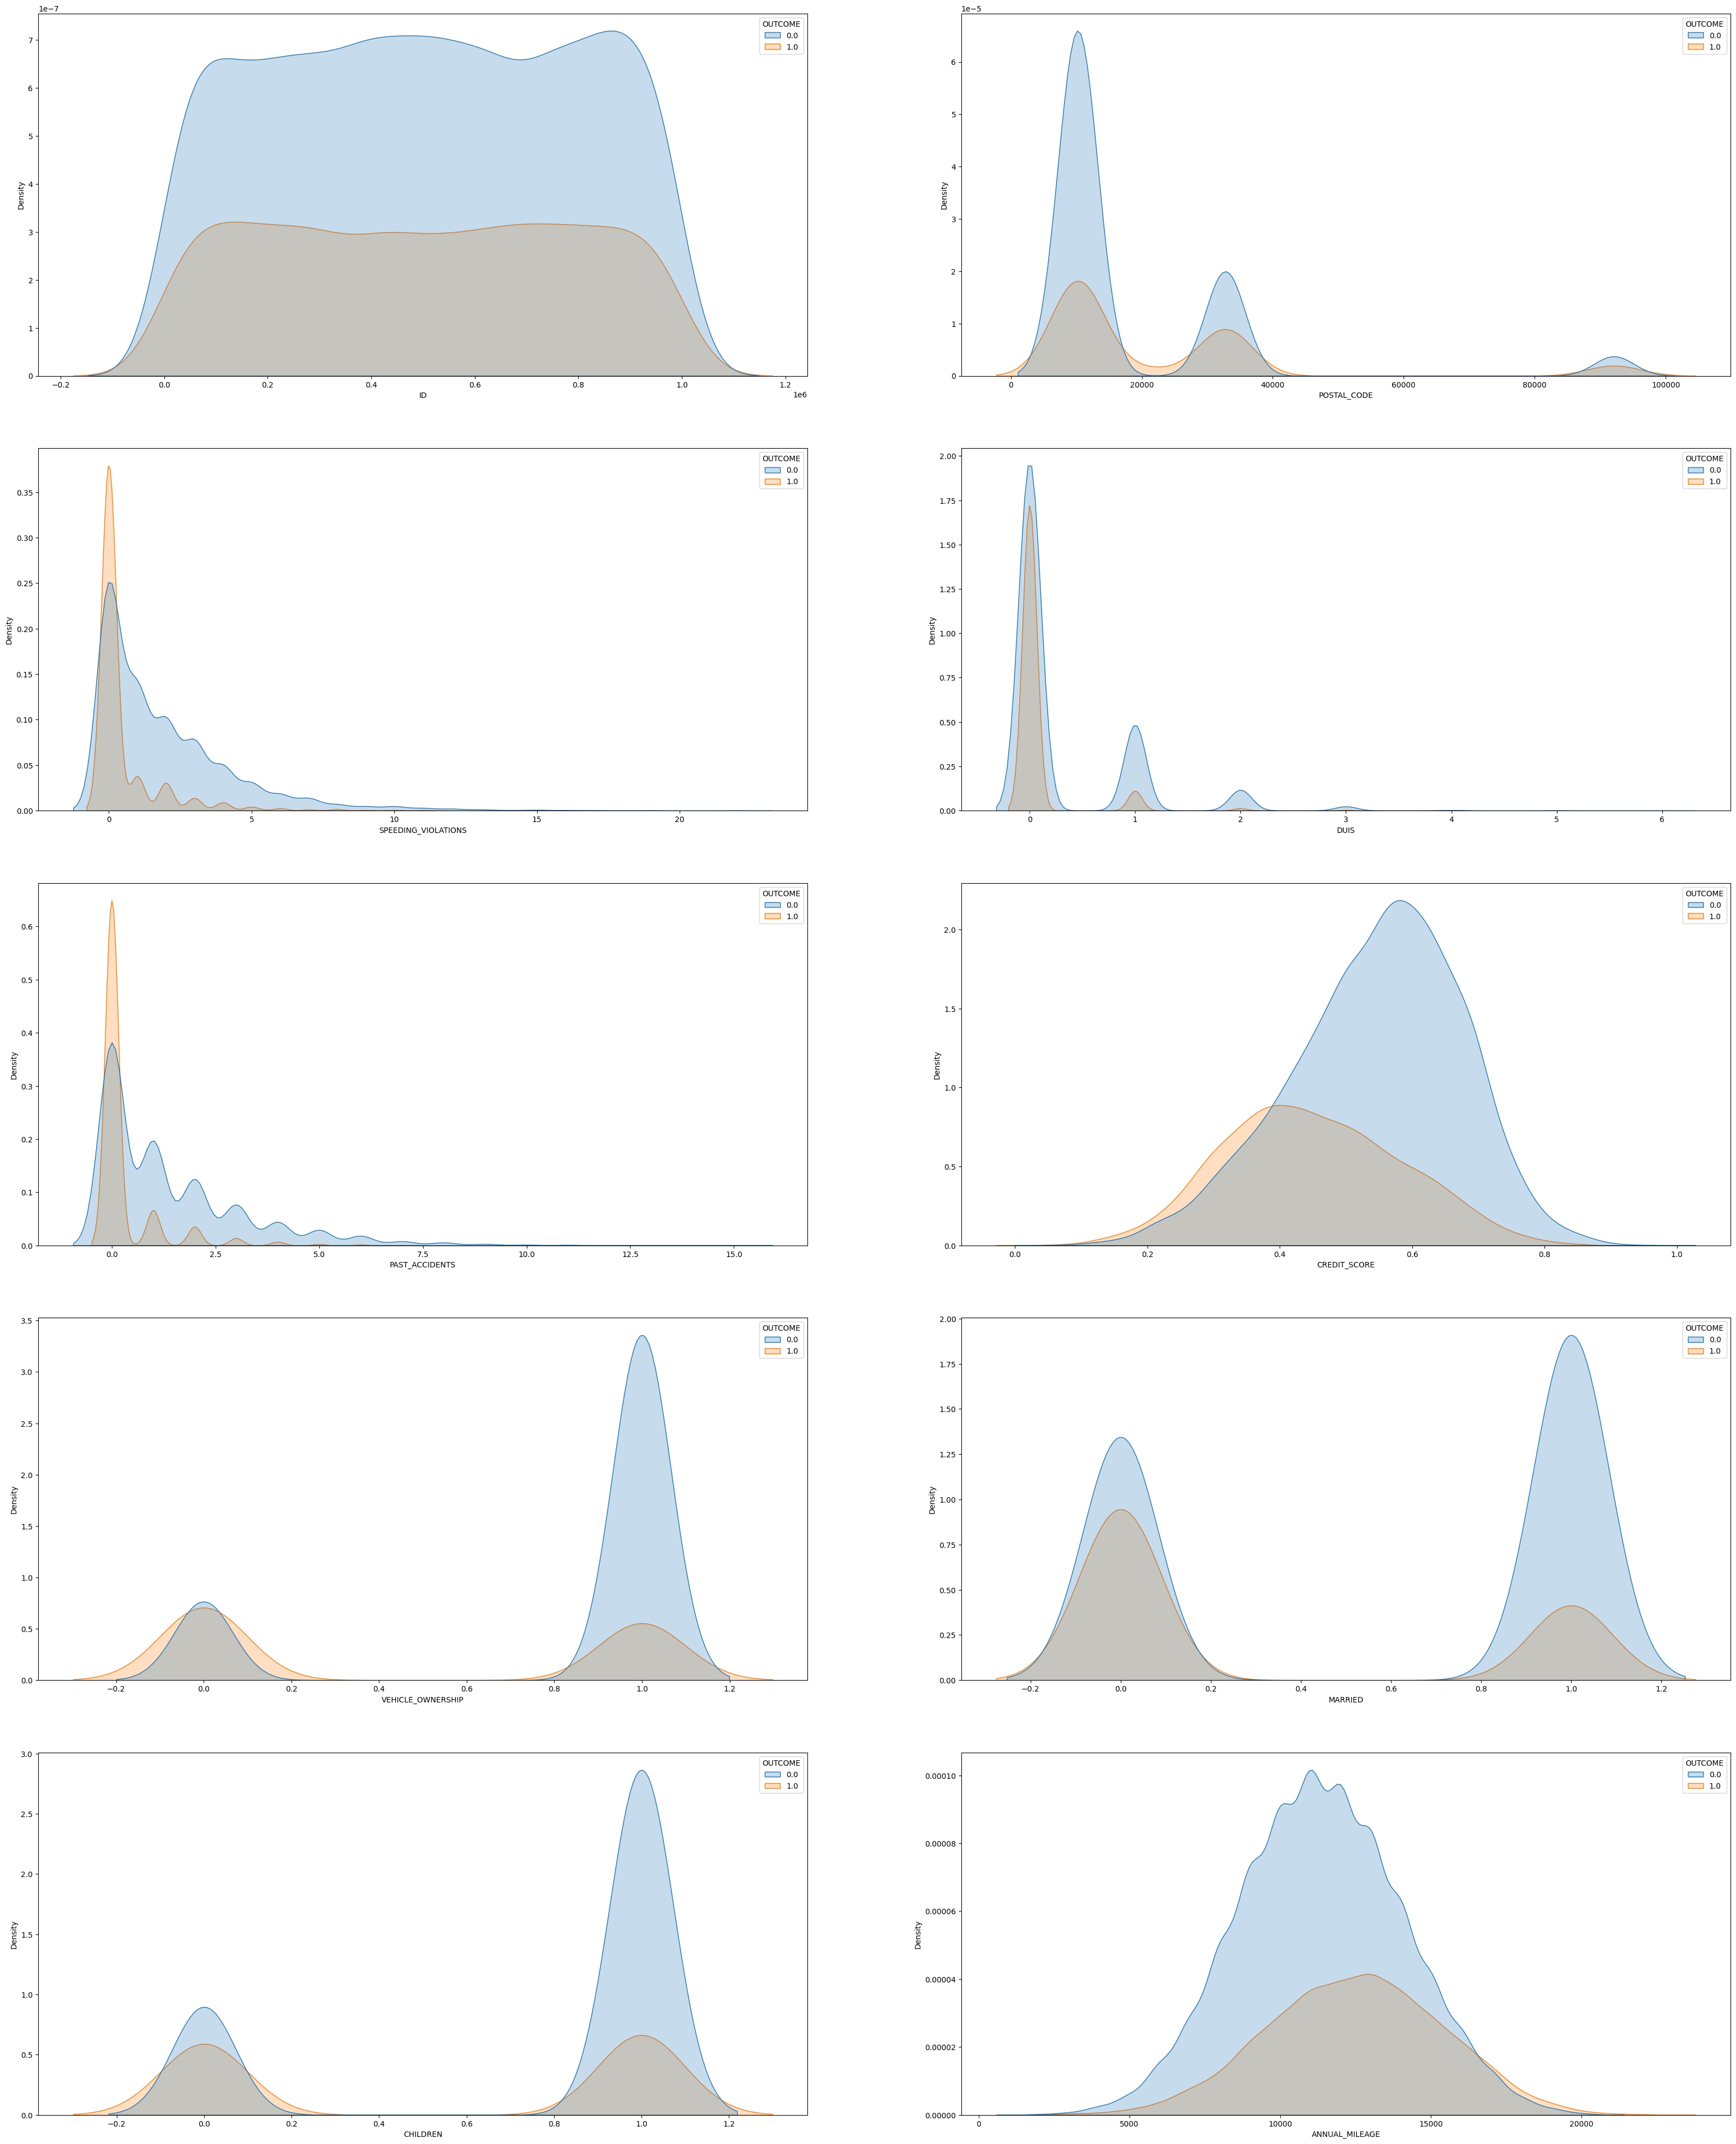

In [9]:
# show the relationship between the features and the target
# for numeric features and the target
fig, axis = plt.subplots(5, 2, figsize = (40, 50))

for col, ax in zip(df.select_dtypes("int64").columns.append(df.select_dtypes("float64").columns), axis.flat[:]):
    sns.kdeplot(data = df, x = col, ax = ax, hue = "OUTCOME", fill = True)

# in this code we can show the binary catorigal values as discrete values (not continues)
# fig, axis = plt.subplots(5, 2, figsize=(40, 50))

# # Combine int64 and float64 columns
# num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# for col, ax in zip(num_cols, axis.flat):
#     unique_vals = df[col].dropna().unique()
    
#     if set(unique_vals) <= {0, 1}:  # binary categorical
#         sns.countplot(data=df, x=col, hue="OUTCOME", ax=ax)
#         ax.set_title(f'{col}')
#     else:  # continuous numeric
#         sns.kdeplot(data=df, x=col, hue="OUTCOME", fill=True, ax=ax)
#         ax.set_title(f'{col}')
        
# plt.tight_layout()
# plt.show()

### 📊 Visualizing the Relationship Between Categorical Features and the Target (`OUTCOME`)

The following code block is used to **analyze the distribution of categorical features** with respect to the **target variable `OUTCOME`** using **count plots**.

- For each selected categorical feature, it plots a **count plot** that shows the number of occurrences for each category, split by the values of `OUTCOME`:
  - `OUTCOME = 0` ❌ → Rejected
  - `OUTCOME = 1` ✅ → Accepted
- The `hue="OUTCOME"` argument color-codes the bars based on the target classes.

### 🧠 Purpose:

These plots helped us understand:
- How many people from each category accepted or rejected the offer.
- Whether certain categories (e.g., a specific gender, education level, or vehicle type) are **more likely to accept** or **reject** the insurance offer.
- Detect **imbalances** or **strong relationships** between feature categories and the target variable.

> Count plots provide valuable insights into the **distribution of categorical variables** and their **influence on the classification target**.


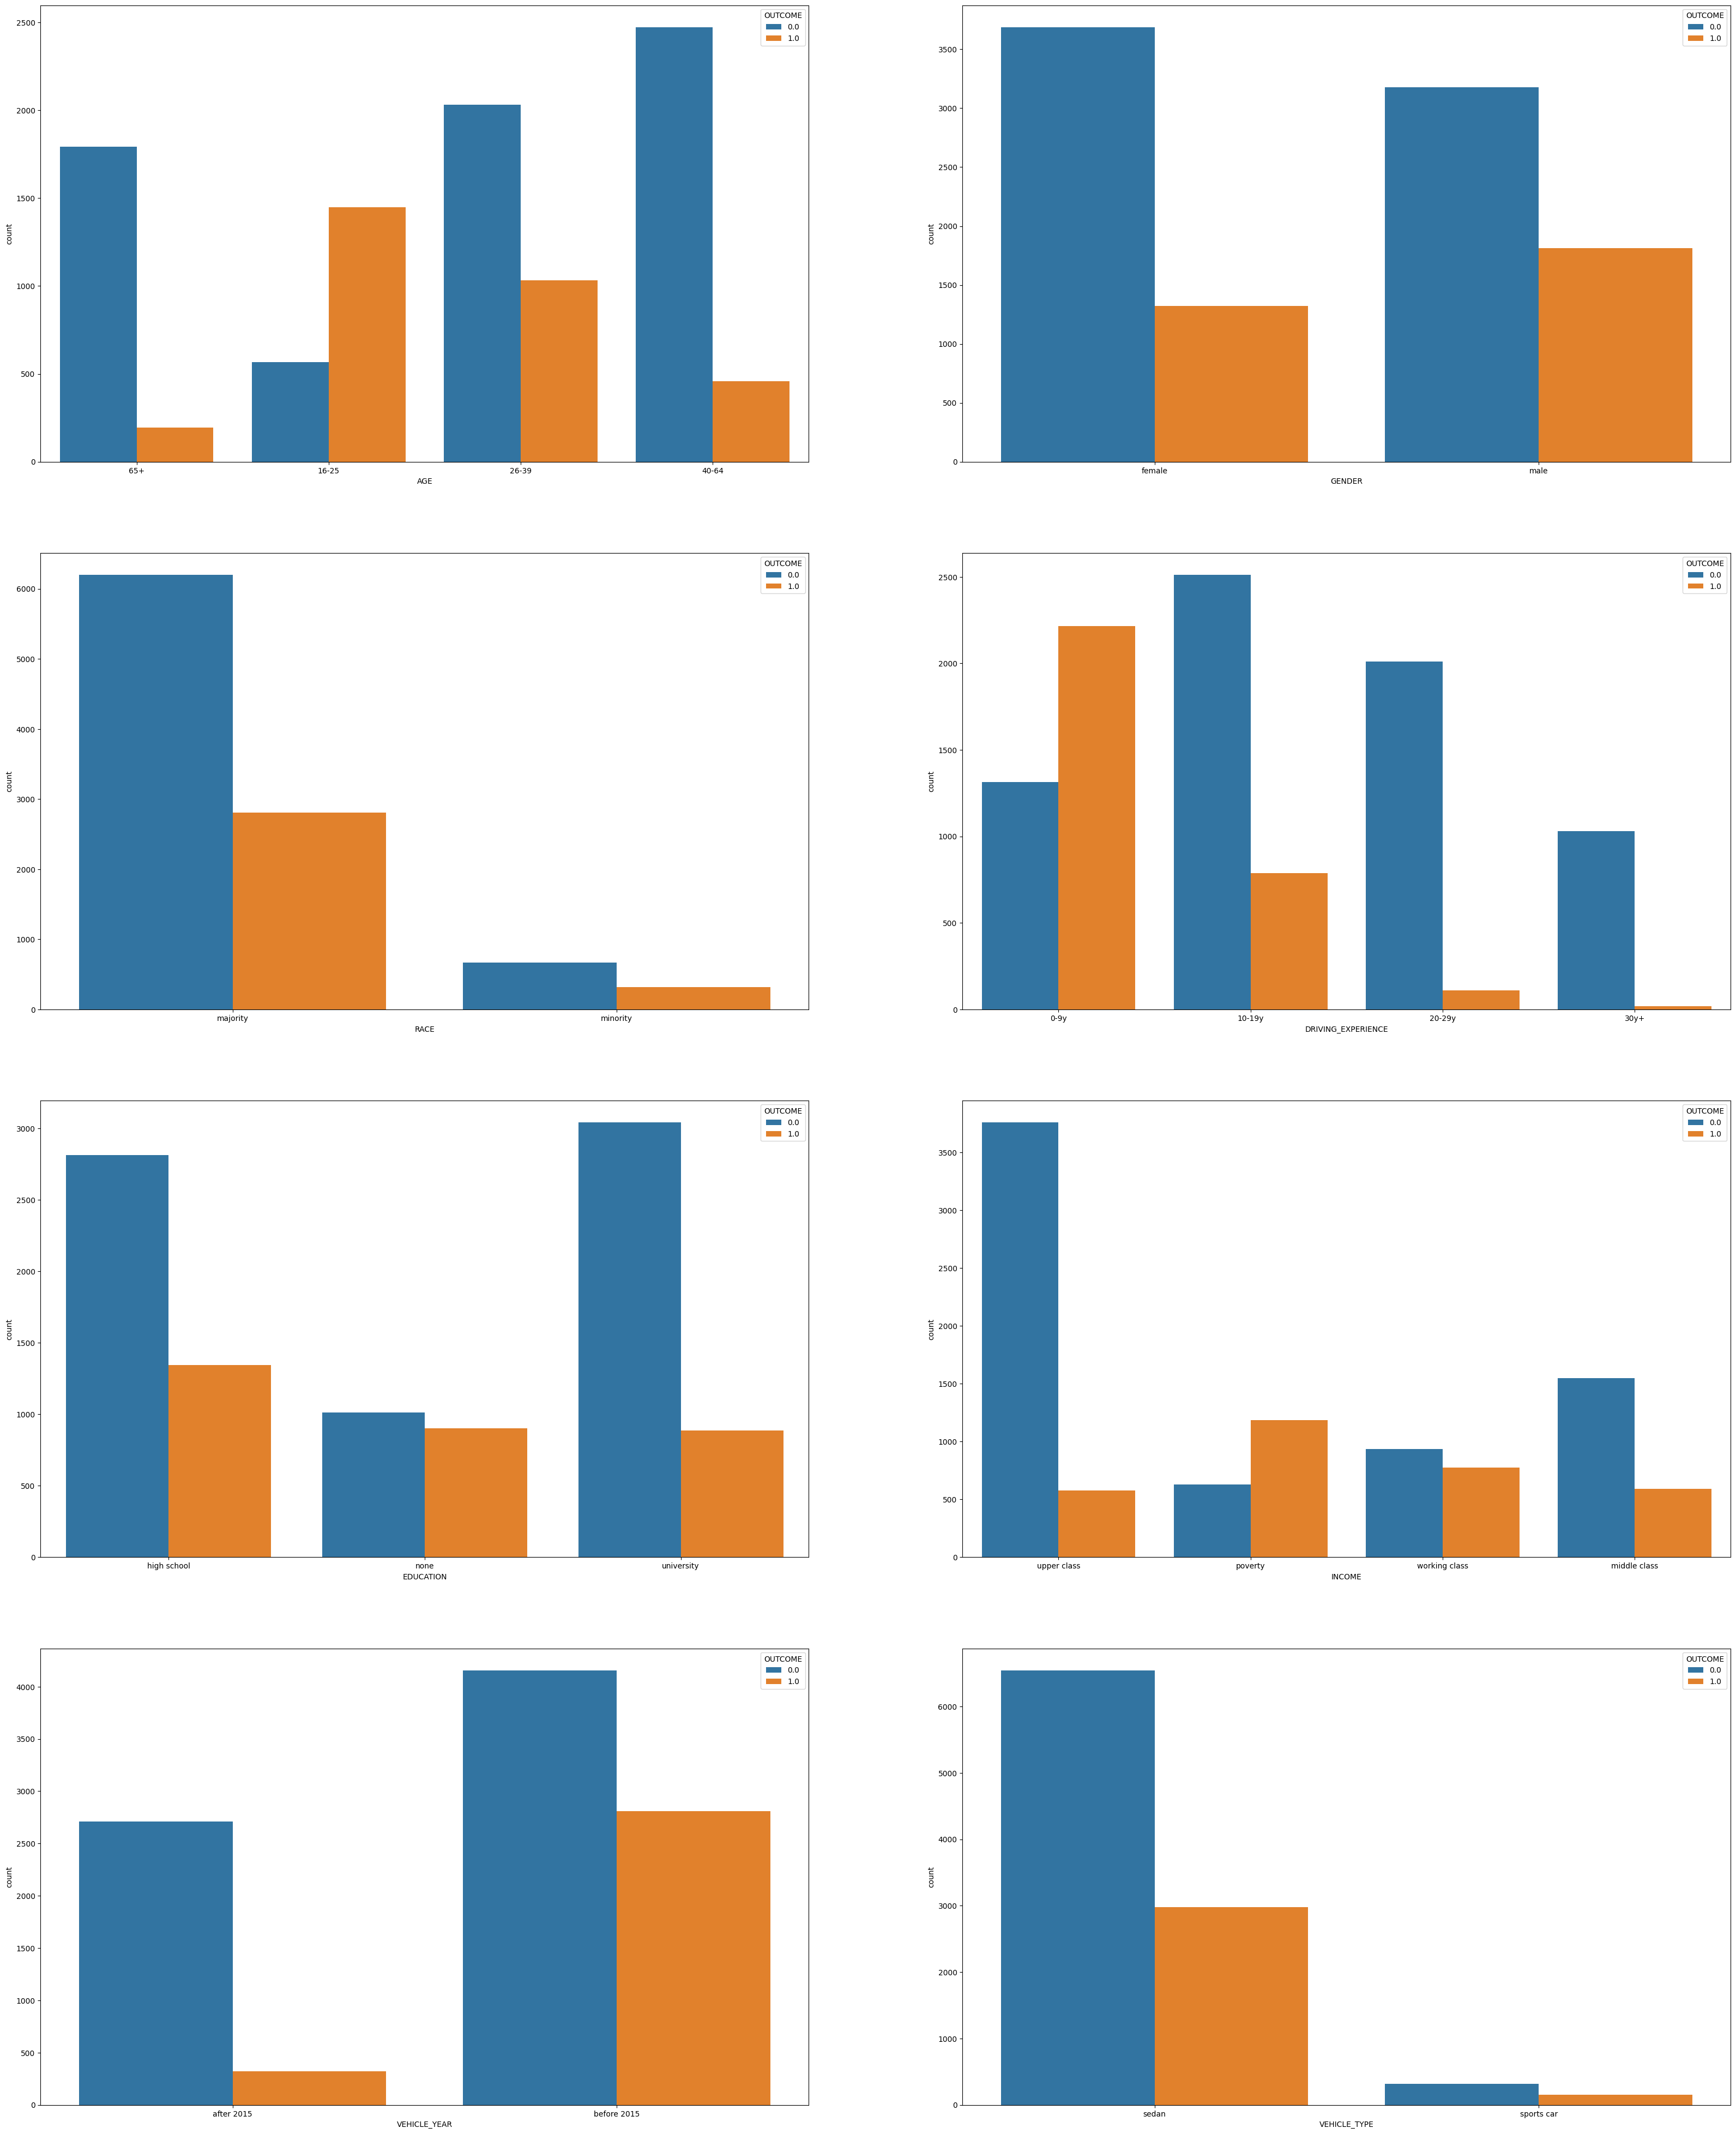

In [10]:
# for non-numeric features and the target
# show the relationship between the features and the target
fig, ax = plt.subplots(4, 2, figsize = (40, 50))

for col, ax in zip(df.select_dtypes("object").columns, ax.flat[:]):
    sns.countplot(data = df, x = col, ax = ax, hue = "OUTCOME")

In [11]:
df.columns
df.shape

(10000, 19)

number of columns missing values is : 2
CREDIT_SCORE      982
ANNUAL_MILEAGE    957
dtype: int64


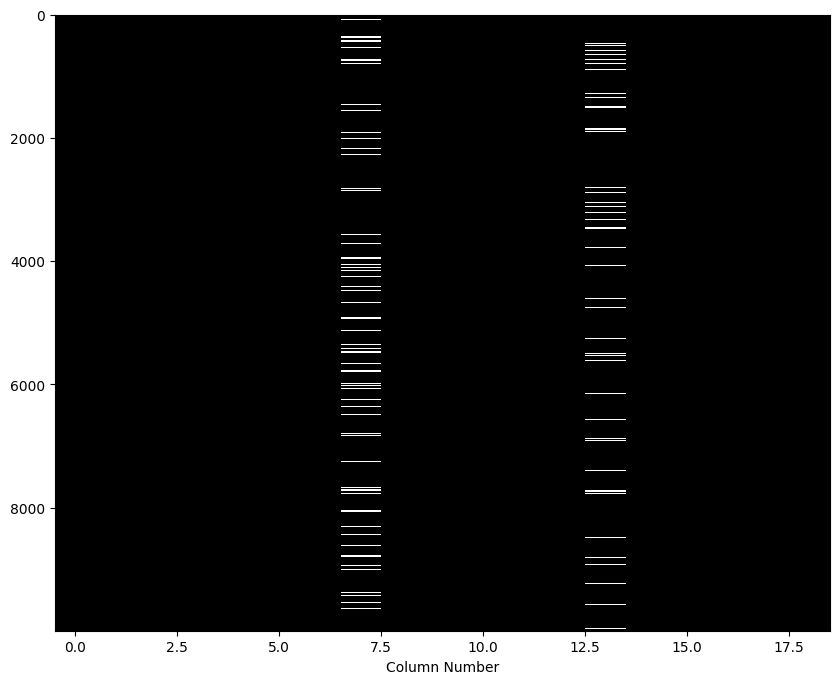

In [12]:
# Preprocessing the data
# check for missing values

plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
sumofMissinfValuesCol = df.isna().sum().sort_values(ascending=False)
print("number of columns missing values is ",end=': ')
print(sumofMissinfValuesCol[sumofMissinfValuesCol != 0].count())
print(sumofMissinfValuesCol[sumofMissinfValuesCol != 0])

In [13]:
df.isnull().sum().sort_values(ascending = False)

CREDIT_SCORE           982
ANNUAL_MILEAGE         957
ID                       0
MARRIED                  0
PAST_ACCIDENTS           0
DUIS                     0
SPEEDING_VIOLATIONS      0
VEHICLE_TYPE             0
POSTAL_CODE              0
CHILDREN                 0
VEHICLE_YEAR             0
AGE                      0
VEHICLE_OWNERSHIP        0
INCOME                   0
EDUCATION                0
DRIVING_EXPERIENCE       0
RACE                     0
GENDER                   0
OUTCOME                  0
dtype: int64

CREDIT_SCORE           9.82
ANNUAL_MILEAGE         9.57
ID                     0.00
MARRIED                0.00
PAST_ACCIDENTS         0.00
DUIS                   0.00
SPEEDING_VIOLATIONS    0.00
VEHICLE_TYPE           0.00
POSTAL_CODE            0.00
CHILDREN               0.00
VEHICLE_YEAR           0.00
AGE                    0.00
VEHICLE_OWNERSHIP      0.00
INCOME                 0.00
EDUCATION              0.00
DRIVING_EXPERIENCE     0.00
RACE                   0.00
GENDER                 0.00
OUTCOME                0.00
dtype: float64
----------------------------------------------------------------


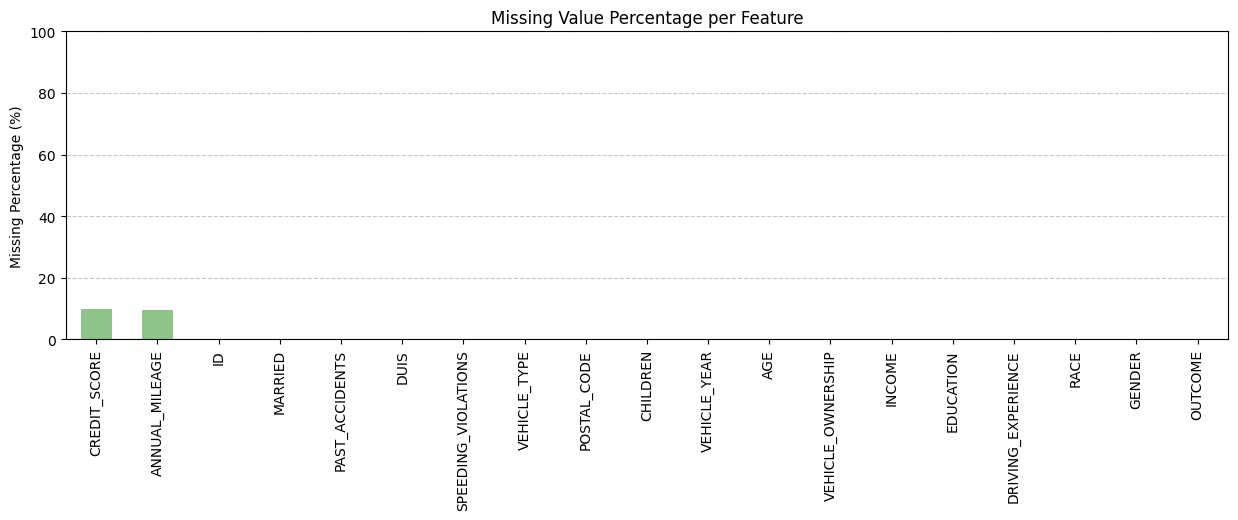

In [14]:
# as we can see we have only two features with null values 
# check the percentage of null values in each feature
# ----------------------------------------------------------------
missingPercentages = df.isna().sum().sort_values(ascending = False)/len(df)*100
print(missingPercentages)
print('----------------------------------------------------------------')
# ----------------------------------------------------------------
# let's check the percentage of missing values visualization.
missingPercentages.plot(kind="bar", figsize=(15, 4), color='#8ec487')
plt.ylim(0, 100)  # Set the y-axis from 0 to 100
plt.ylabel("Missing Percentage (%)")
plt.title("Missing Value Percentage per Feature")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 🛠️ Data Preprocessing

**Data preprocessing** is a critical step in any machine learning pipeline. It involves preparing raw data so that machine learning algorithms can learn efficiently and accurately. Without proper preprocessing, models may perform poorly or produce misleading results.

---

### 🤔 Why do we need preprocessing?

- 🧼 **Handle missing values:** Real-world data is often incomplete. We need to fill or remove missing entries to prevent errors.
- 🔢 **Convert data types:** Many ML algorithms work only with numerical data — categorical values must be encoded.
- ⚖️ **Feature scaling:** Ensures that features are on the same scale, especially important for distance-based models.
- 🧠 **Encode categorical variables:** Text categories need to be converted into numeric formats using encoding techniques.
- 🧹 **Remove irrelevant features:** Columns that don't contribute to prediction (e.g., IDs or redundant features) can hurt performance.
- ⚖️📊 **Handle class imbalance:** When one class dominates the target variable, special techniques may be needed to avoid biased models.

---

### ⚙️ Common Preprocessing Steps

1. 🧽 **Cleaning:** Fill or drop missing data.
2. 🧮 **Encoding:** Convert categories (e.g., "Male", "Female") into numbers.
3. 🧪 **Train-Test Split:** Separate the data for training and evaluation.
4. 📏 **Scaling:** Normalize/standardize numeric features.

---

✅ **Goal:** Make the data clean, consistent, and suitable for training accurate machine learning models.

Next, we’ll apply these steps to our dataset before training the models. 🚀


- **Drop unuseful features:** the ID will not help in any thing so we drop it.

In [15]:
df = df.drop(["ID"], axis=1)
df = df.drop(["POSTAL_CODE"], axis=1)

### 1️⃣ **Handle missing values:** so as we know we have two features with missing values , since it has 10% missing values so it is save to keep it instead of dropping it.
--- 
    start for "ANNUAL_MILEAGE" first we show the distrbution of it.

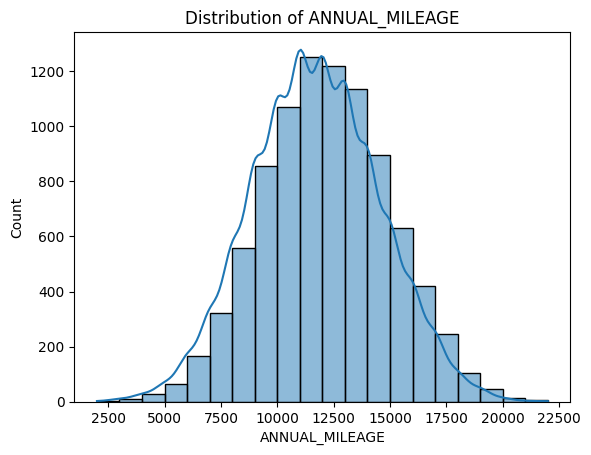

In [16]:

sns.histplot(df["ANNUAL_MILEAGE"], bins=20, kde=True)
plt.title("Distribution of ANNUAL_MILEAGE")
plt.show()


- 📊 **Based on the distribution graph, the data appears to be fairly symmetric** — there are no significant outliers or heavy skewness.

- ➕ **Therefore, we decided to use the _mean_ to fill in the missing values**, as it is a suitable choice when the data is normally or symmetrically distributed.


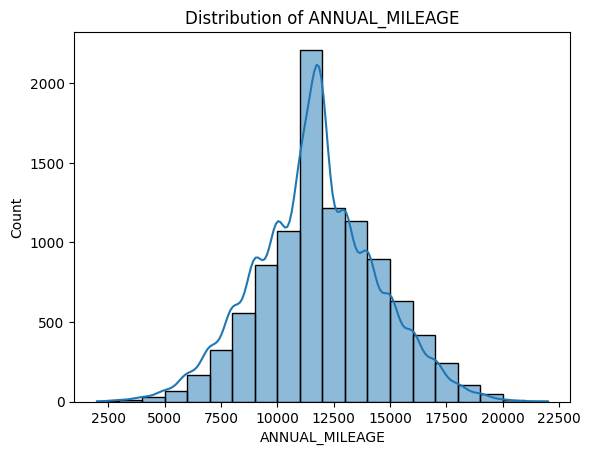

In [17]:
df["ANNUAL_MILEAGE"] = df["ANNUAL_MILEAGE"].fillna(int(np.mean(df["ANNUAL_MILEAGE"])))
sns.histplot(df["ANNUAL_MILEAGE"], bins=20, kde=True)
plt.title("Distribution of ANNUAL_MILEAGE")
plt.show()

    Now for "CREDIT_SCORE" we show the distrbution of it.

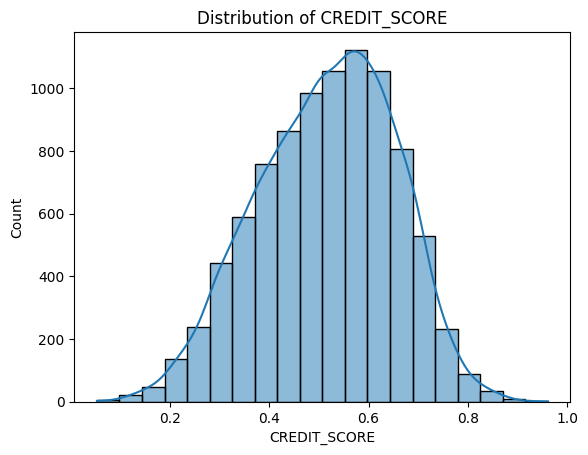

In [18]:
sns.histplot(df["CREDIT_SCORE"], bins=20, kde=True)
plt.title("Distribution of CREDIT_SCORE")
plt.show()


- 📊 **Based on the distribution graph, the data appears to be fairly symmetric** — there are no significant outliers or heavy skewness.

- ➕ **Therefore, we decided to use the _mean_ also to fill in the missing values**, as it is a suitable choice when the data is normally or symmetrically distributed.


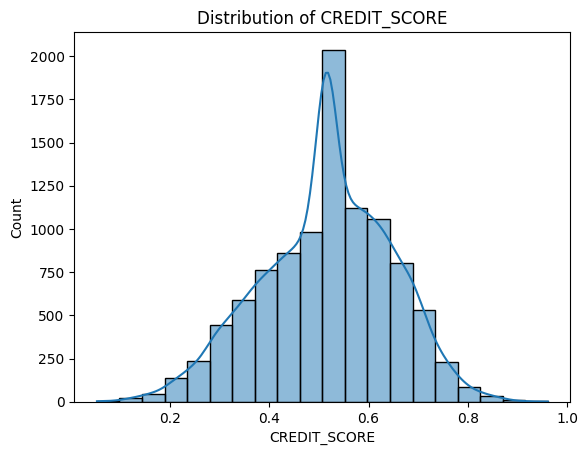

In [19]:
df["CREDIT_SCORE"] = df["CREDIT_SCORE"].fillna(np.mean(df["CREDIT_SCORE"]))
sns.histplot(df["CREDIT_SCORE"], bins=20, kde=True)
plt.title("Distribution of CREDIT_SCORE")
plt.show()


number of columns missing values is : 0
Series([], dtype: int64)


AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

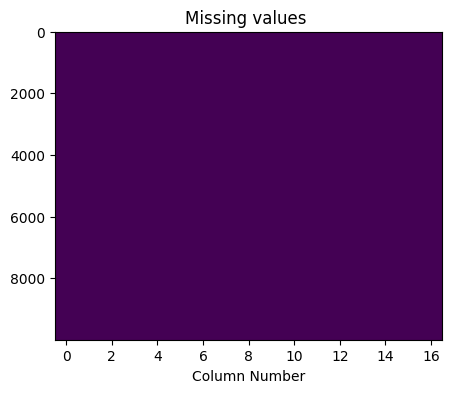

In [20]:
plt.figure(figsize=(5, 4))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="viridis")
plt.title("Missing values ")
plt.xlabel("Column Number")
sumofMissinfValuesCol = df.isna().sum().sort_values(ascending=False)
print("number of columns missing values is ",end=': ')
print(sumofMissinfValuesCol[sumofMissinfValuesCol != 0].count())
print(sumofMissinfValuesCol[sumofMissinfValuesCol != 0])
df.isna().sum()

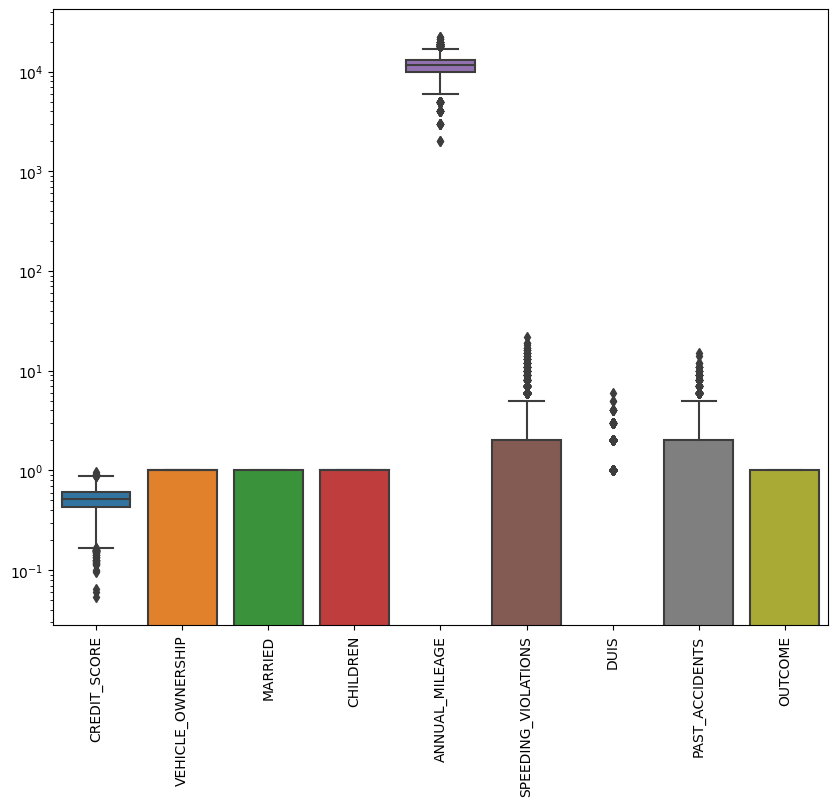

In [21]:
# check the outliers 
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

In [22]:
# this for detectiong the outliers
def detect_outliers(df):
    outlier_summary = {}
    
    # Only check numeric columns
    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        count = outliers.count()
        percentage = round((count / df.shape[0]) * 100, 2)
        
        outlier_summary[col] = {"Outlier Count": count, "Outlier %": percentage}
    
    return pd.DataFrame(outlier_summary).T.sort_values("Outlier %", ascending=False)

# Run the function and display the results
outlier_stats = detect_outliers(df)
outlier_stats

,Outlier Count,Outlier %
DUIS,1882.0,18.82
SPEEDING_VIOLATIONS,588.0,5.88
PAST_ACCIDENTS,285.0,2.85
ANNUAL_MILEAGE,273.0,2.73
CREDIT_SCORE,57.0,0.57
VEHICLE_OWNERSHIP,0.0,0.00
MARRIED,0.0,0.00
CHILDREN,0.0,0.00
OUTCOME,0.0,0.00


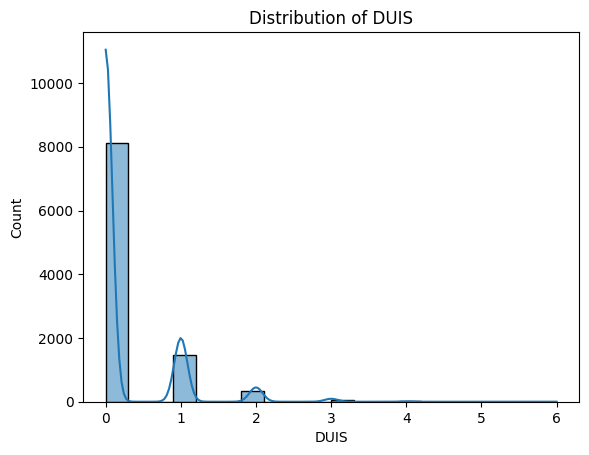

In [23]:
#the distrbution of DUIS
sns.histplot(df["DUIS"], bins=20, kde=True)
plt.title("Distribution of DUIS")
plt.show()

- 📊 **Based on the distribution graph,	High outliers represent important risky behavior so we can not remove them** 

<Axes: >

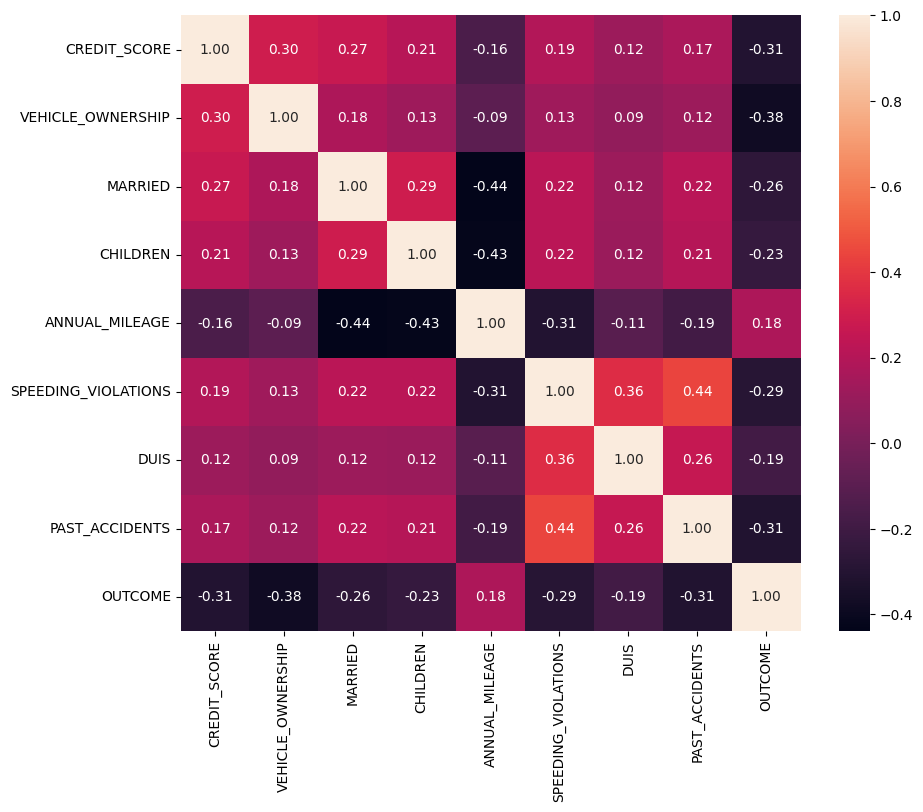

In [24]:
# check the correlation between the features
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f")


### 2️⃣ **Encoding**

Since we have **8 categorical features**, we need to apply encoding to convert them into numerical values so that machine learning algorithms can process them correctly.

---

### 🧠 We used two types of encoding:
- 🔢 **Label Encoding** – used for **ordinal** features (where order matters).
- 🔥 **One-Hot Encoding** – used for **nominal** features (no inherent order).

---

### 🗂️ **Encoding Applied to Our Categorical Features:**

#### 🔢 **Label Encoding (Ordinal)**
These features have a clear, logical order:
- `AGE`
- `DRIVING_EXPERIENCE`
- `EDUCATION`
- `INCOME`

#### 🔥 **One-Hot Encoding (Nominal)**
These features are categorical but **do not have any natural order**:
- `GENDER`
- `RACE`
- `VEHICLE_YEAR`
- `VEHICLE_TYPE`

---

✅ With this encoding strategy, our machine learning model can correctly interpret the categorical data and learn effectively!


In [25]:
labelEncoder = LabelEncoder()
oneHotEncoder = OneHotEncoder()

In [26]:
df["GENDER"] = labelEncoder.fit_transform(df["GENDER"])
print("GENDER:", df['GENDER'].unique())

df["VEHICLE_TYPE"] = labelEncoder.fit_transform(df["VEHICLE_TYPE"])
print("VEHICLE_TYPE:", df["VEHICLE_TYPE"].unique())

df["VEHICLE_YEAR"] = labelEncoder.fit_transform(df["VEHICLE_YEAR"])
print("VEHICLE_YEAR:", df["VEHICLE_YEAR"].unique())

df["RACE"] = labelEncoder.fit_transform(df["RACE"])
print("RACE:", df["RACE"].unique())

GENDER: [0 1]
VEHICLE_TYPE: [0 1]
VEHICLE_YEAR: [0 1]
RACE: [0 1]


In [27]:
# Use pd.get_dummies for one-hot encoding of these columns
df = pd.get_dummies(df, columns=["AGE", "DRIVING_EXPERIENCE", "EDUCATION", "INCOME"], dtype=int)


In [28]:
df

,GENDER,RACE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,...,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_high school,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class
0,0,0,0.629027,1.0,0,0.0,1.0,12000.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0.357757,0.0,1,0.0,0.0,16000.0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0.493146,1.0,1,0.0,0.0,11000.0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0.206013,1.0,1,0.0,1.0,11000.0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0.388366,1.0,1,0.0,0.0,12000.0,0,2,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0.582787,1.0,1,0.0,0.0,16000.0,0,0,...,1,0,0,0,0,1,0,0,1,0
9996,0,0,0.522231,1.0,0,0.0,1.0,11697.0,0,1,...,1,0,0,0,1,0,1,0,0,0
9997,1,0,0.470940,1.0,1,0.0,1.0,14000.0,0,0,...,0,0,0,1,0,0,1,0,0,0
9998,0,0,0.364185,0.0,1,0.0,1.0,13000.0,0,2,...,1,0,0,1,0,0,0,1,0,0


### 3️⃣ **Train-Test Split:**
### in this step we will split the data set in a way that we will have 30 % of data is used for testing and 70% of data is used for traning

---

### 30 % test and 70% train






In [29]:
X = df.drop(columns=["OUTCOME"])
y = df["OUTCOME"]   
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [30]:
print("training data shape:", x_train.shape)
print("testing data shape:", x_test.shape)

training data shape: (7000, 27)
testing data shape: (3000, 27)


- ⚖️📊 **Handle class imbalance:** When one class dominates the target variable, special techniques may be needed to avoid biased models.
- ⚖️📊 **التعامل مع عدم توازن الفئة:** عندما تهيمن فئة واحدة على المتغير المستهدف، قد تكون هناك حاجة إلى تقنيات خاصة لتجنب النماذج المتحيزة.

In [31]:
# target distribution after SMOTE (balancing)
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)
# check the shape of the scaled data
print("training data shape:", x_train.shape)
print("testing data shape:", x_test.shape)

training data shape: (9608, 27)
testing data shape: (3000, 27)


OUTCOME
0.0    4804
1.0    4804
Name: count, dtype: int64


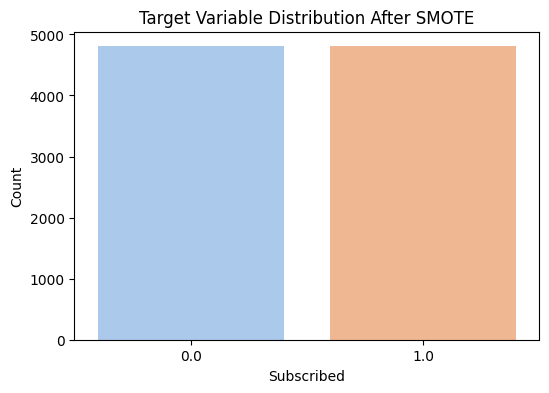

In [32]:
# target variable distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette='pastel')
print(y_train.value_counts())
plt.title('Target Variable Distribution After SMOTE')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.show()


### 4️⃣ **Scaling:**
### Normalize numeric features

---


In [33]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [34]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

## 🧠 Machine Learning Model Building and Evaluating

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNeighbors Classifier": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(),
    "Neural Network": MLPClassifier(random_state=42),
    "gBoost": GradientBoostingClassifier(),
    "Ada Boost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
}

In [38]:
param_grids = {
    "Decision Tree": {
        "max_depth": [3, 5, 7, None],
        "min_samples_split": [2, 5, 10],
        "criterion": ["gini", "entropy"]
    },
    "KNeighbors Classifier": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf", "poly"],
        "gamma": ["scale", "auto"]
    },
    "Random Forest": {
        "n_estimators": [50,100, 200],
        "max_depth": [ 5,10, 20,None],
        "min_samples_split": [2, 5],
        "criterion": ["gini", "entropy"]
    },
    "Extra Trees": {
        "n_estimators": [50,100, 200],
        "max_depth": [5, 10, 20,None],
        "min_samples_split": [2, 5],
        "criterion": ["gini", "entropy"]
    },
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "penalty": ["l2"],
        "solver": ["lbfgs", "liblinear"]
    },
    "XGBoost": {
        "n_estimators": [50,100, 200],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.7, 1.0]
    },
    "Neural Network": {
        "hidden_layer_sizes": [(20,), (50,), (100,)],
        "alpha": [0.0001, 0.001],
        "activation": ["logistic", "relu"],
        "max_iter": [200, 300]
    },

    "Ada Boost": {
        "n_estimators": [50,100, 200],
        "learning_rate": [0.5, 1.0, 1.5]
    },
    "Bagging": {
        "n_estimators": [50, 100, 150],
        "max_samples": [0.5, 1.0],
        "max_features": [0.5, 1.0]
    },
}

In [42]:



results = []
roc_data = {} 
predicted = []

for name, model in models.items():
    print(f"🔍 Training {name}...")

    params = param_grids.get(name, {})
    grid = GridSearchCV(model, params, cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(x_train, y_train)

    best_model = grid.best_estimator_
    best_params = grid.best_params_

    y_pred = best_model.predict(x_test)

    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(x_test)[:, 1]
    else:
        if hasattr(best_model, "decision_function"):
            y_proba = best_model.decision_function(x_test)
        else:
            y_proba = np.zeros_like(y_test)

    predicted.append(y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_data[name] = (fpr, tpr, auc_score)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="binary", zero_division=0),
        "Recall": recall_score(y_test, y_pred, average="binary", zero_division=0),
        "F1 Score": f1_score(y_test, y_pred, average="binary", zero_division=0),
        "AUC": roc_auc_score(y_test, y_proba)
        # "Best Params": best_params
    })

    print(f"✅ Best parameters for {name}: {best_params}")

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="AUC", ascending=False).reset_index(drop=True)


🔍 Training Decision Tree...
✅ Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2}
🔍 Training KNeighbors Classifier...
✅ Best parameters for KNeighbors Classifier: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
🔍 Training SVM...
✅ Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
🔍 Training Naive Bayes...
✅ Best parameters for Naive Bayes: {}
🔍 Training Random Forest...
✅ Best parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
🔍 Training Extra Trees...
✅ Best parameters for Extra Trees: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
🔍 Training Logistic Regression...
✅ Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
🔍 Training XGBoost...
✅ Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
🔍 Training Ne

C:\Users\basha\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ Best parameters for Neural Network: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'max_iter': 300}
🔍 Training gBoost...
✅ Best parameters for gBoost: {}
🔍 Training Ada Boost...
✅ Best parameters for Ada Boost: {'learning_rate': 1.5, 'n_estimators': 50}
🔍 Training Bagging...
✅ Best parameters for Bagging: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 150}


In [43]:
df_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.733333,0.543272,0.917823,0.682540,0.888962
1,Neural Network,0.740667,0.551859,0.902882,0.685020,0.880913
2,Extra Trees,0.737667,0.549867,0.882604,0.677591,0.872521
3,KNeighbors Classifier,0.796333,0.649267,0.756670,0.698866,0.858788
4,Naive Bayes,0.716667,0.529097,0.844184,0.650493,0.849846
5,Random Forest,0.611667,0.442366,0.933831,0.600343,0.829979
6,SVM,0.761667,0.585123,0.814301,0.680946,0.804129
7,gBoost,0.352000,0.323271,0.982924,0.486529,0.654120
8,Ada Boost,0.327000,0.315861,0.990395,0.478968,0.559105
9,Bagging,0.450333,0.356220,0.941302,0.516847,0.523963


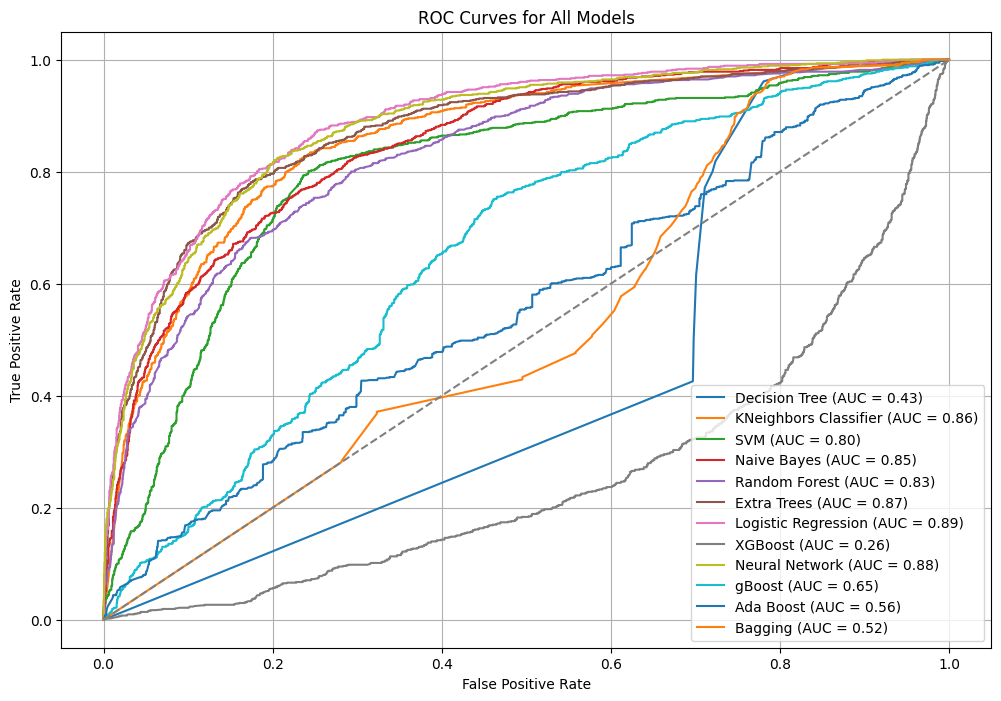

In [44]:
plt.figure(figsize=(12, 8))
for name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

### 🧠 What Does AUC Mean?

**AUC** means **Area Under the Curve** — it comes from a graph called the **ROC curve** (Receiver Operating Characteristic).

---

### ✅ What Is It Used For?

- AUC shows **how well a model can tell the difference between two classes** (like 0 and 1).
- A **higher AUC** means the model is **better at making correct predictions**.

---

> **AUC tells us how good the model is at telling 0s and 1s apart — the higher the number, the better the model!**


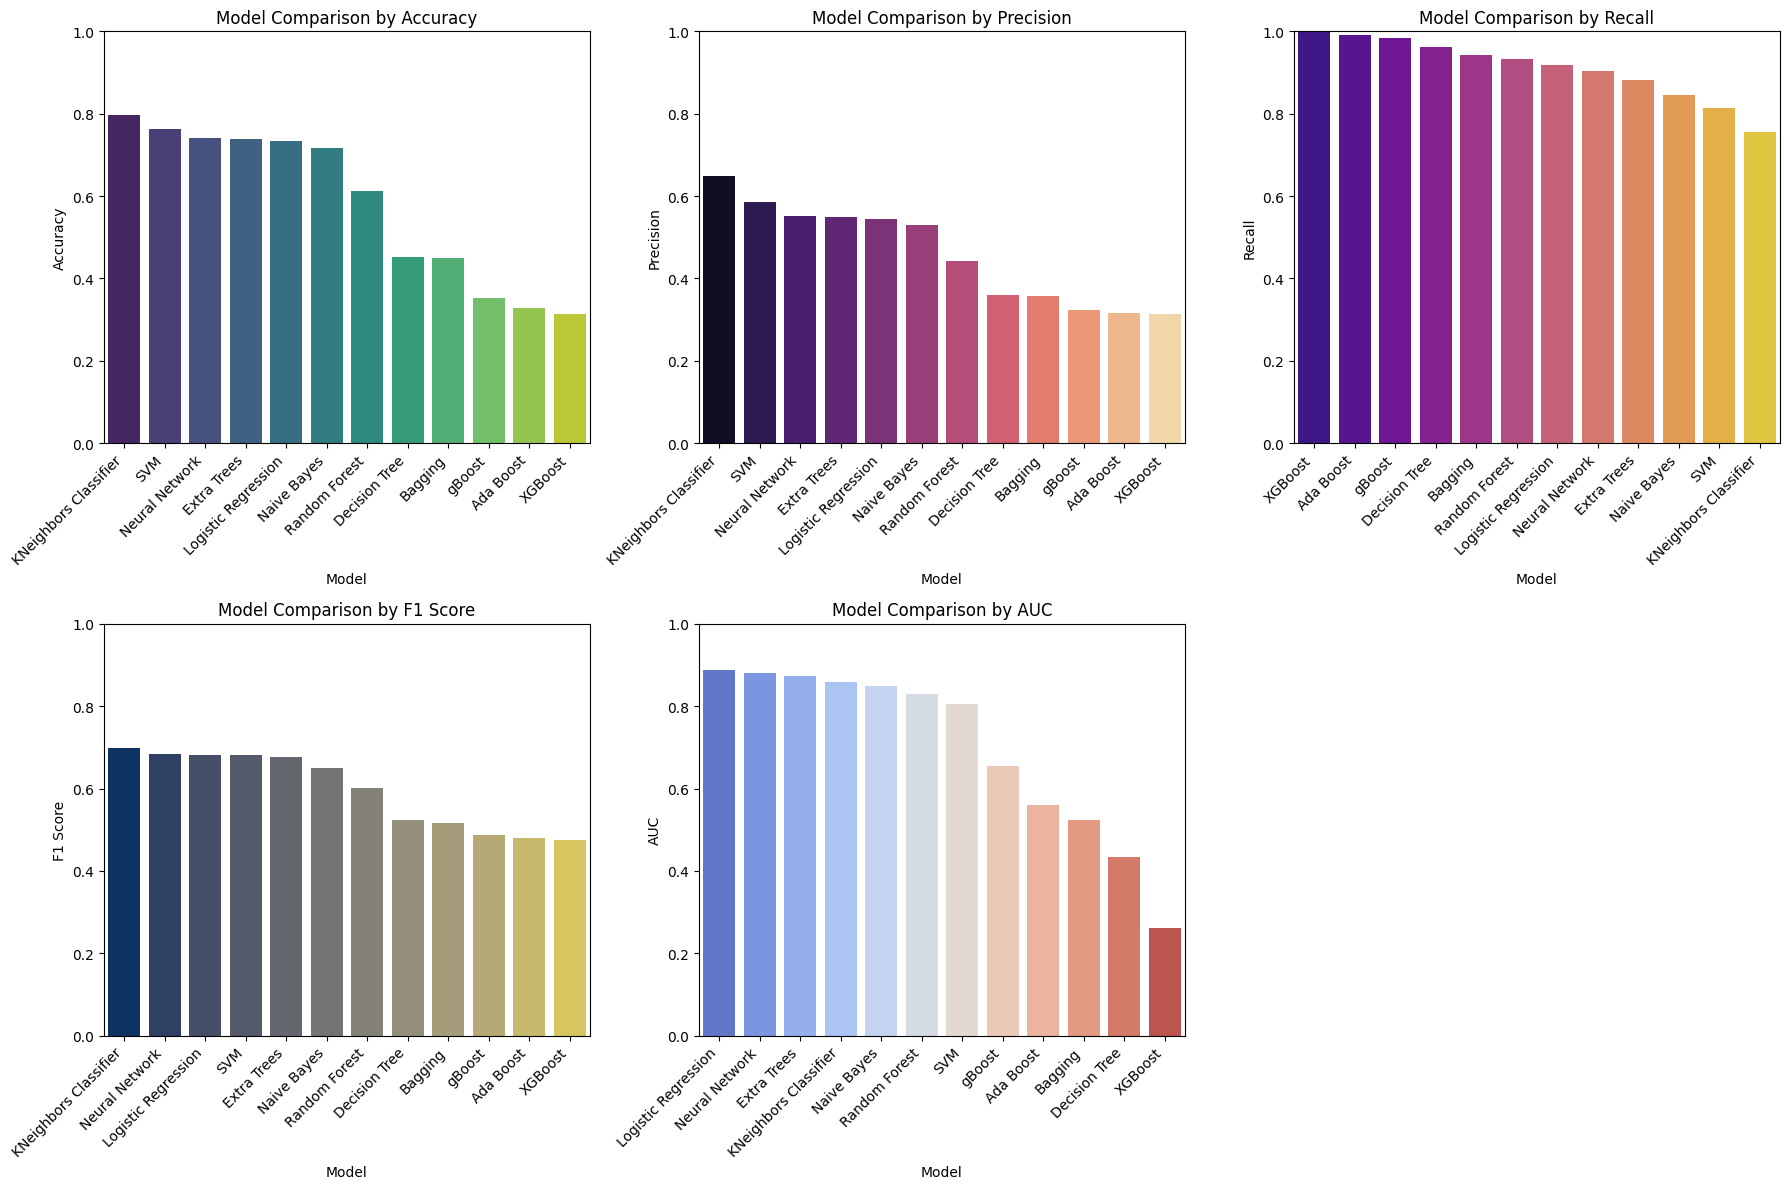

In [45]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
palettes = ['viridis', 'magma', 'plasma', 'cividis', 'coolwarm']

plt.figure(figsize=(18, 12))

for i, (metric, palette) in enumerate(zip(metrics, palettes), 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns grid
    sns.barplot(data=df_results.sort_values(by=metric, ascending=False), 
                x='Model', y=metric, palette=palette)
    plt.title(f'Model Comparison by {metric}')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.tight_layout()

plt.show()

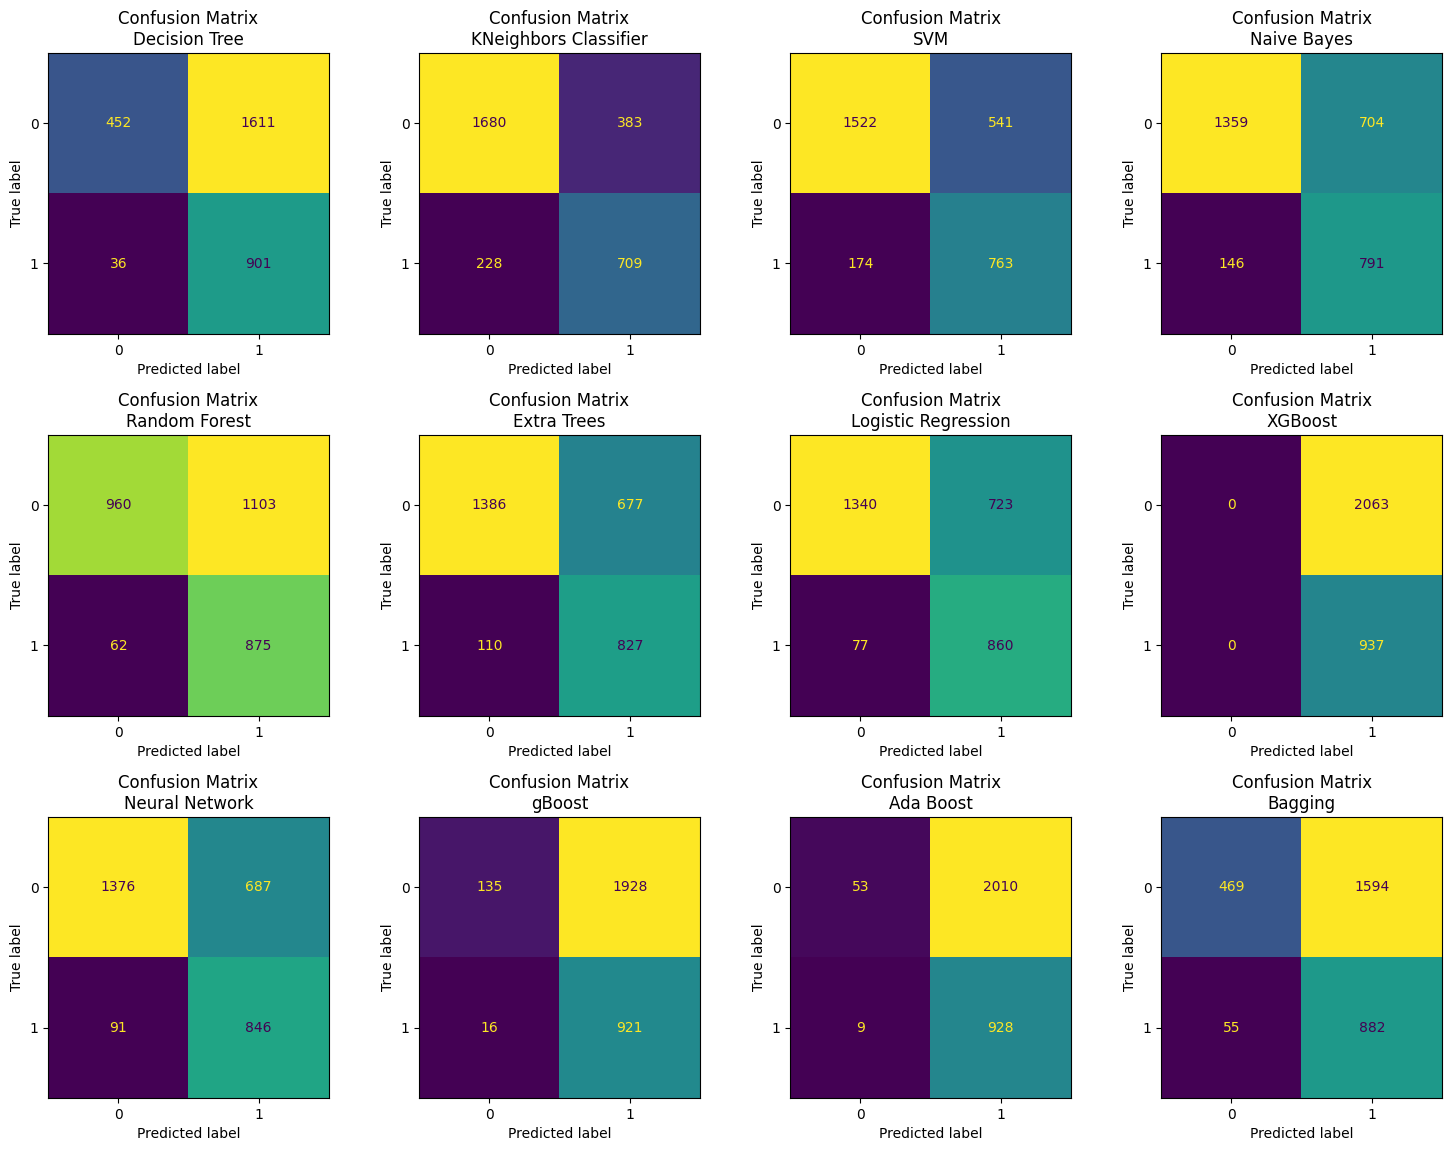

In [46]:
# confusion_matrix
plt.figure(figsize=(15, 15))
for i, (name, y_pred) in enumerate(zip(models.keys(), predicted)):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    plt.subplot(4, 4, i + 1)  # Adjust grid size if you have more or fewer models
    disp.plot(ax=plt.gca(), colorbar=False)
    plt.title(f"Confusion Matrix\n{name}")
    plt.grid(False)

plt.tight_layout()
plt.show()

### 📜 **get the classification_report for each algorithm**

In [47]:
# get the classification_report for each algorithm
for i, j in zip(list(models.keys()), predicted):
    print (' \n \n ', i, ' : \n \n', classification_report(j, y_test))

 
 
  Decision Tree  : 
 
               precision    recall  f1-score   support

         0.0       0.22      0.93      0.35       488
         1.0       0.96      0.36      0.52      2512

    accuracy                           0.45      3000
   macro avg       0.59      0.64      0.44      3000
weighted avg       0.84      0.45      0.50      3000

 
 
  KNeighbors Classifier  : 
 
               precision    recall  f1-score   support

         0.0       0.81      0.88      0.85      1908
         1.0       0.76      0.65      0.70      1092

    accuracy                           0.80      3000
   macro avg       0.79      0.76      0.77      3000
weighted avg       0.79      0.80      0.79      3000

 
 
  SVM  : 
 
               precision    recall  f1-score   support

         0.0       0.74      0.90      0.81      1696
         1.0       0.81      0.59      0.68      1304

    accuracy                           0.76      3000
   macro avg       0.78      0.74      0.75      

C:\Users\basha\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\basha\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\basha\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 🌟 **This highlights the contribution of each feature to the target prediction**

> Feature importance helps us understand which features are most influential in predicting the outcome.  
> This is especially useful for model interpretation and feature selection.


In [48]:
# for SVM 
svc = LinearSVC()
svc.fit(x_train, y_train)

importances = np.abs(svc.coef_[0])
sorted_indices = np.argsort(importances)[::-1]

for i in sorted_indices[:]:
    print(f"{X.columns[i]}: {importances[i]}")

AGE_26-39: 0.9483187503975752
INCOME_upper class: 0.9360614327569415
DRIVING_EXPERIENCE_10-19y: 0.9212555361372018
AGE_40-64: 0.8988105998824893
AGE_16-25: 0.8824638254588084
DRIVING_EXPERIENCE_20-29y: 0.8697611500193063
EDUCATION_high school: 0.8521849652442255
EDUCATION_university: 0.8218135843506558
INCOME_poverty: 0.8030793003596606
INCOME_middle class: 0.7800083758259014
AGE_65+: 0.7645128871105183
INCOME_working class: 0.7300691487376765
EDUCATION_none: 0.69097751452355
DRIVING_EXPERIENCE_30y+: 0.6891604967450963
DRIVING_EXPERIENCE_0-9y: 0.6807370351471284
VEHICLE_OWNERSHIP: 0.2626288969621771
VEHICLE_YEAR: 0.21823409032424057
PAST_ACCIDENTS: 0.14365623280903378
GENDER: 0.1243393772130143
MARRIED: 0.06342588828901141
RACE: 0.051964883612354004
SPEEDING_VIOLATIONS: 0.04859868467876873
ANNUAL_MILEAGE: 0.043060152750287316
CHILDREN: 0.028064156597629848
VEHICLE_TYPE: 0.021932696366846718
DUIS: 0.01807793303274353
CREDIT_SCORE: 0.005591684330820523


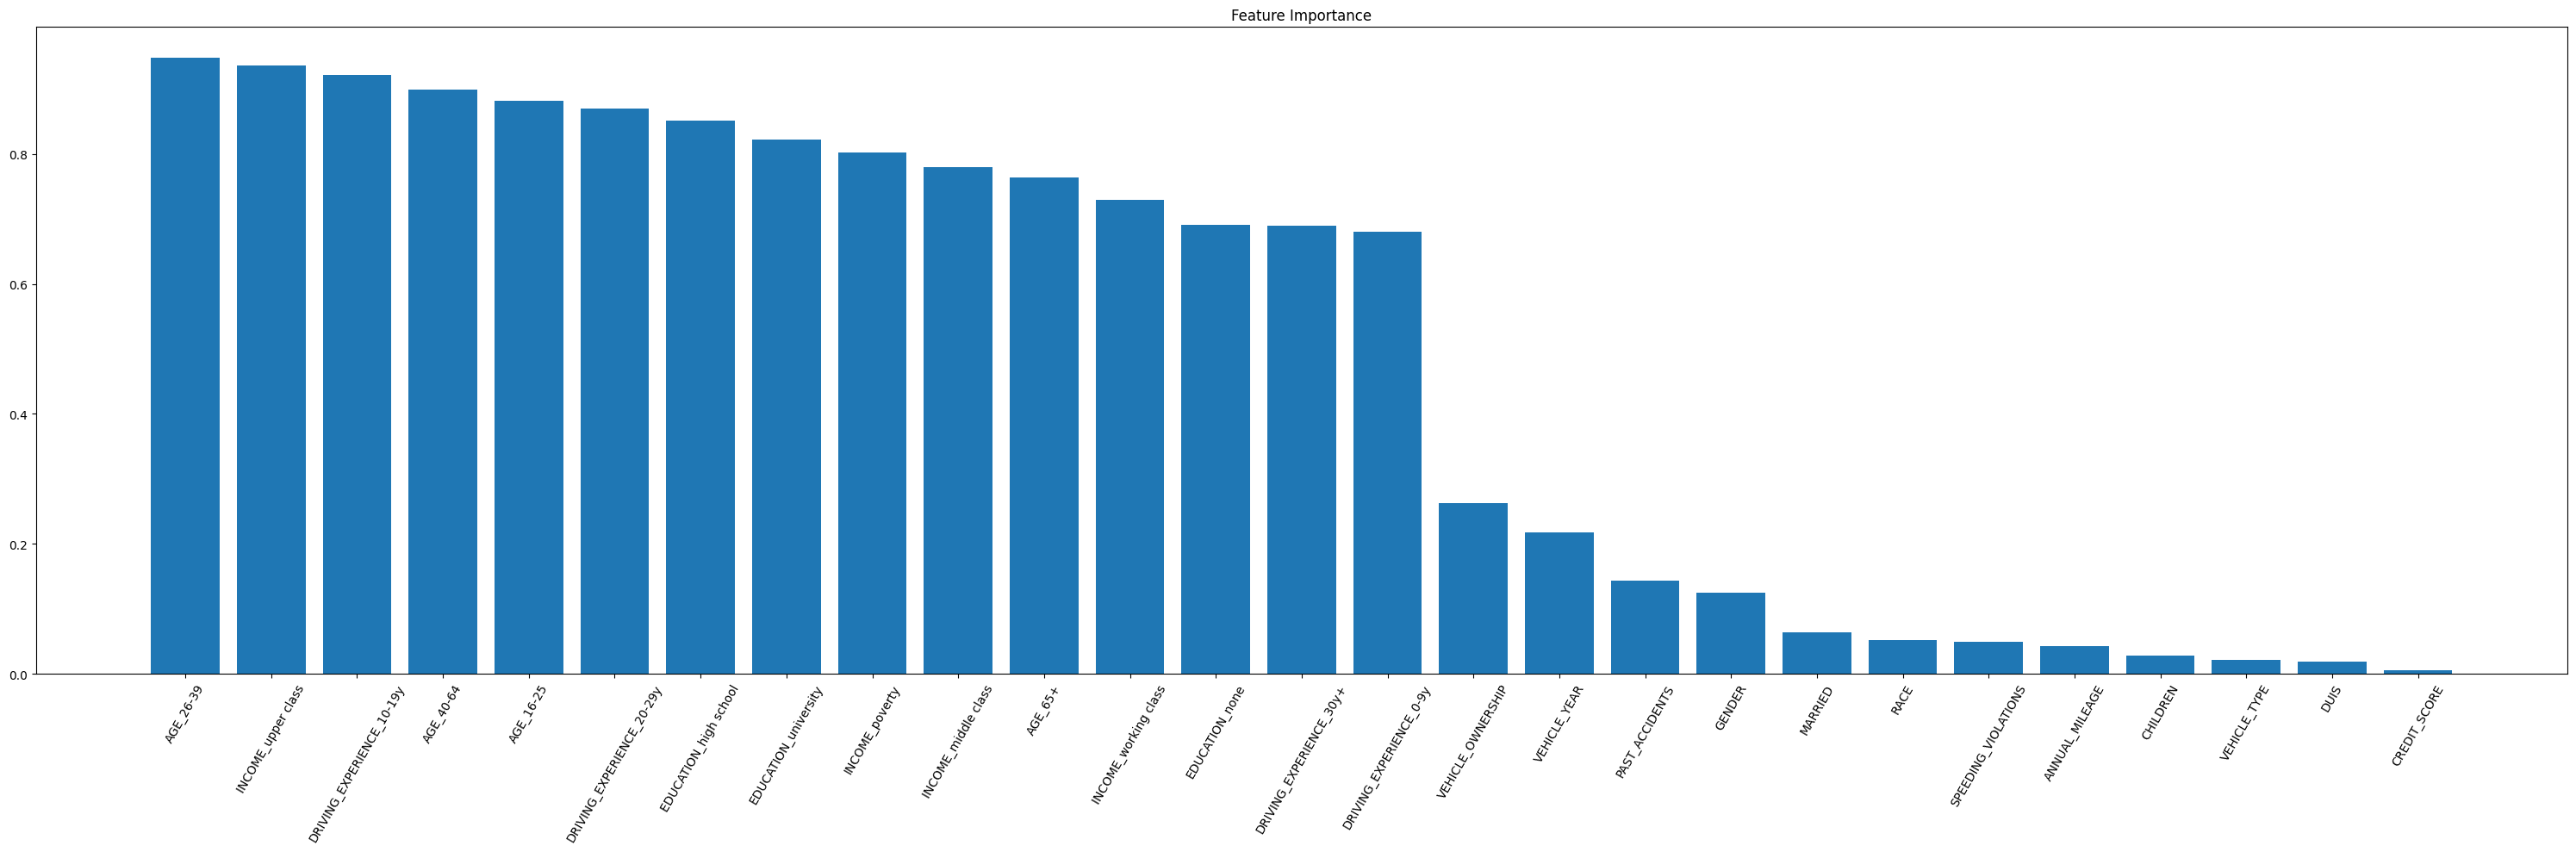

In [49]:
x_train = pd.DataFrame(x_train, columns = X.columns)
 
plt.subplots(figsize = (30,10))
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation = 60)
plt.tight_layout()
plt.show()

### 📊 Model Results Summary

- **Top Performing Models:**  
  - **KNeighbors Classifier** achieves the highest accuracy (79.6%) and strong precision (64.9%) with balanced recall (75.7%) and a solid AUC (0.859).  
  - **SVM** follows with good accuracy (76.2%) and balanced precision (58.5%) and recall (81.4%), offering solid overall performance with an AUC of 0.804.  
  - **Neural Network** and **Extra Trees** show similar performance with accuracy around 74%, precision above 55%, and good recall (~88% and 90%), supported by AUC values around 0.87-0.88.

- **Moderate Performers:**  
  - **Logistic Regression** and **Naive Bayes** provide reasonable accuracy (~73% and 71.7%) and recall (around 84-92%), but lower precision (54.3% and 52.9%) and slightly higher F1 scores reflecting a trade-off.  
  - **Random Forest** has lower accuracy (61.6%) but very high recall (92.9%), indicating strong detection of positive cases at the cost of lower precision (44.5%).

- **Poor Performing Models:**  
  - **Bagging**, **gBoost**, **Ada Boost**, **Decision Tree**, and **XGBoost** all show low accuracy (31% to 45%) and relatively poor precision (around 31-36%). Despite extremely high recall (close to or at 1.0), their F1 scores remain low due to the low precision, indicating many false positives.  
  - AUC values for these models range from 0.26 (XGBoost) up to 0.75 (Bagging), suggesting poor overall discriminative ability.

---

### 🔑 **Conclusion:**  
- **KNeighbors Classifier** and **SVM** stand out as the best models in the dataset, delivering a strong balance of accuracy, precision, recall, and AUC.  
- **Neural Network** and **Extra Trees** are solid alternatives, offering competitive results with slightly different trade-offs.  
- Models like **Logistic Regression** and **Naive Bayes** are useful if prioritizing recall is important but require care due to moderate precision.  

